In [29]:
%pylab inline
pylab.rcParams["figure.figsize"] = (15,5)

Populating the interactive namespace from numpy and matplotlib


In [30]:
from rtlsdr import RtlSdr

In [31]:
Fcarrier = 104.5e6
Foffset = 128e3
Fc = Fcarrier+Foffset # Center frequency
Fs = 1024000          # Sample rate

N = int(2 * Fs) # Pull in this many samples
gain = 38.6     # Gain

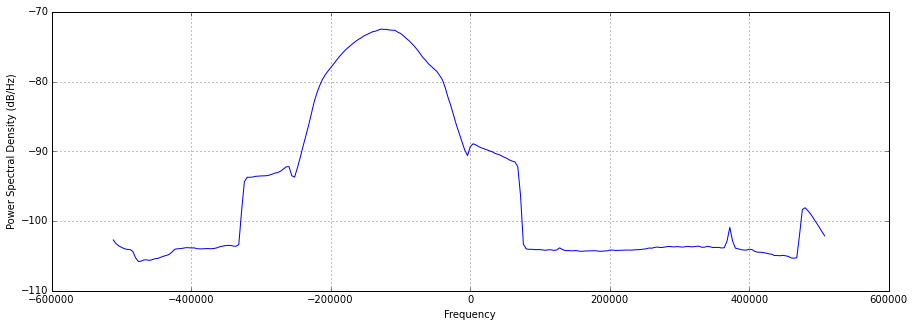

In [32]:
sdr = RtlSdr()
# configure device
sdr.sample_rate = int(Fs) # Hz
sdr.center_freq = int(Fc) # Hz
sdr.gain = gain

# Read samples
samples = sdr.read_samples(N)
sdr.close()
del(sdr)

psd(samples, Fs=Fs); None

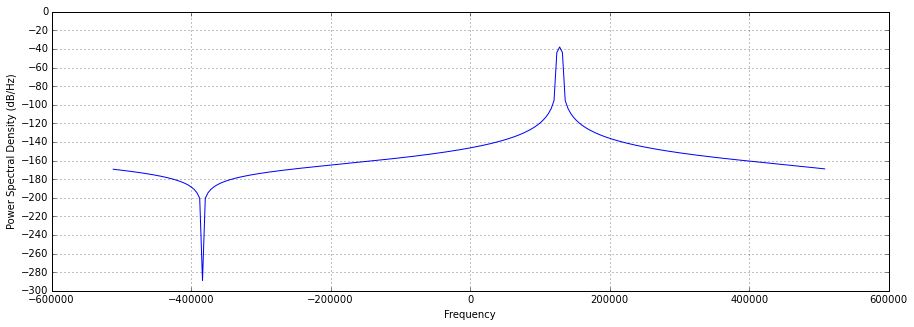

In [33]:
phase_vel = (2*np.pi*Foffset)/Fs
t = np.arange(0, len(samples), 1.0)
x_offset = np.cos(t*phase_vel) + 1.0j * np.sin(t*phase_vel)
psd(x_offset, Fs=Fs); None

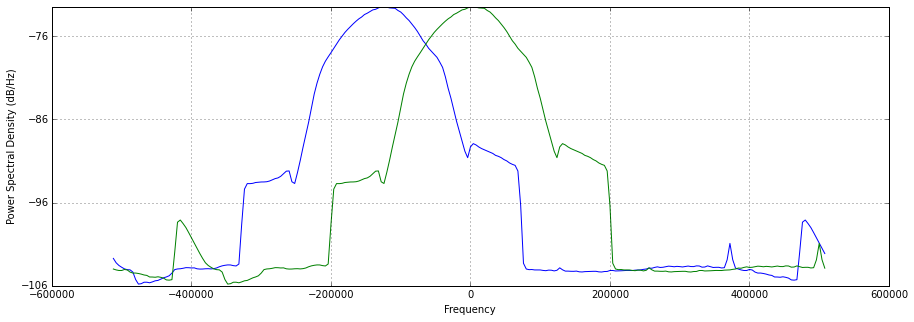

In [34]:
samples_shifted = samples * x_offset
psd(samples, Fs=Fs)
psd(samples_shifted, Fs=Fs)
None